In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
sys.path.append('../../')

from astroLuSt.preprocessing import scaling as alprsc


import importlib
importlib.reload(alprsc)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

# AxisScaler

### Generate a dataset

This dataset will contian the following:
- `nsamples` samples
- `ncols` datapoints along first axes (columns)
- `nrows` datapoints along second axes (rows)
- `nchannels` number of channels (values per cell)

each sample consists of `ncols * nrows * nchannels` sine curves.

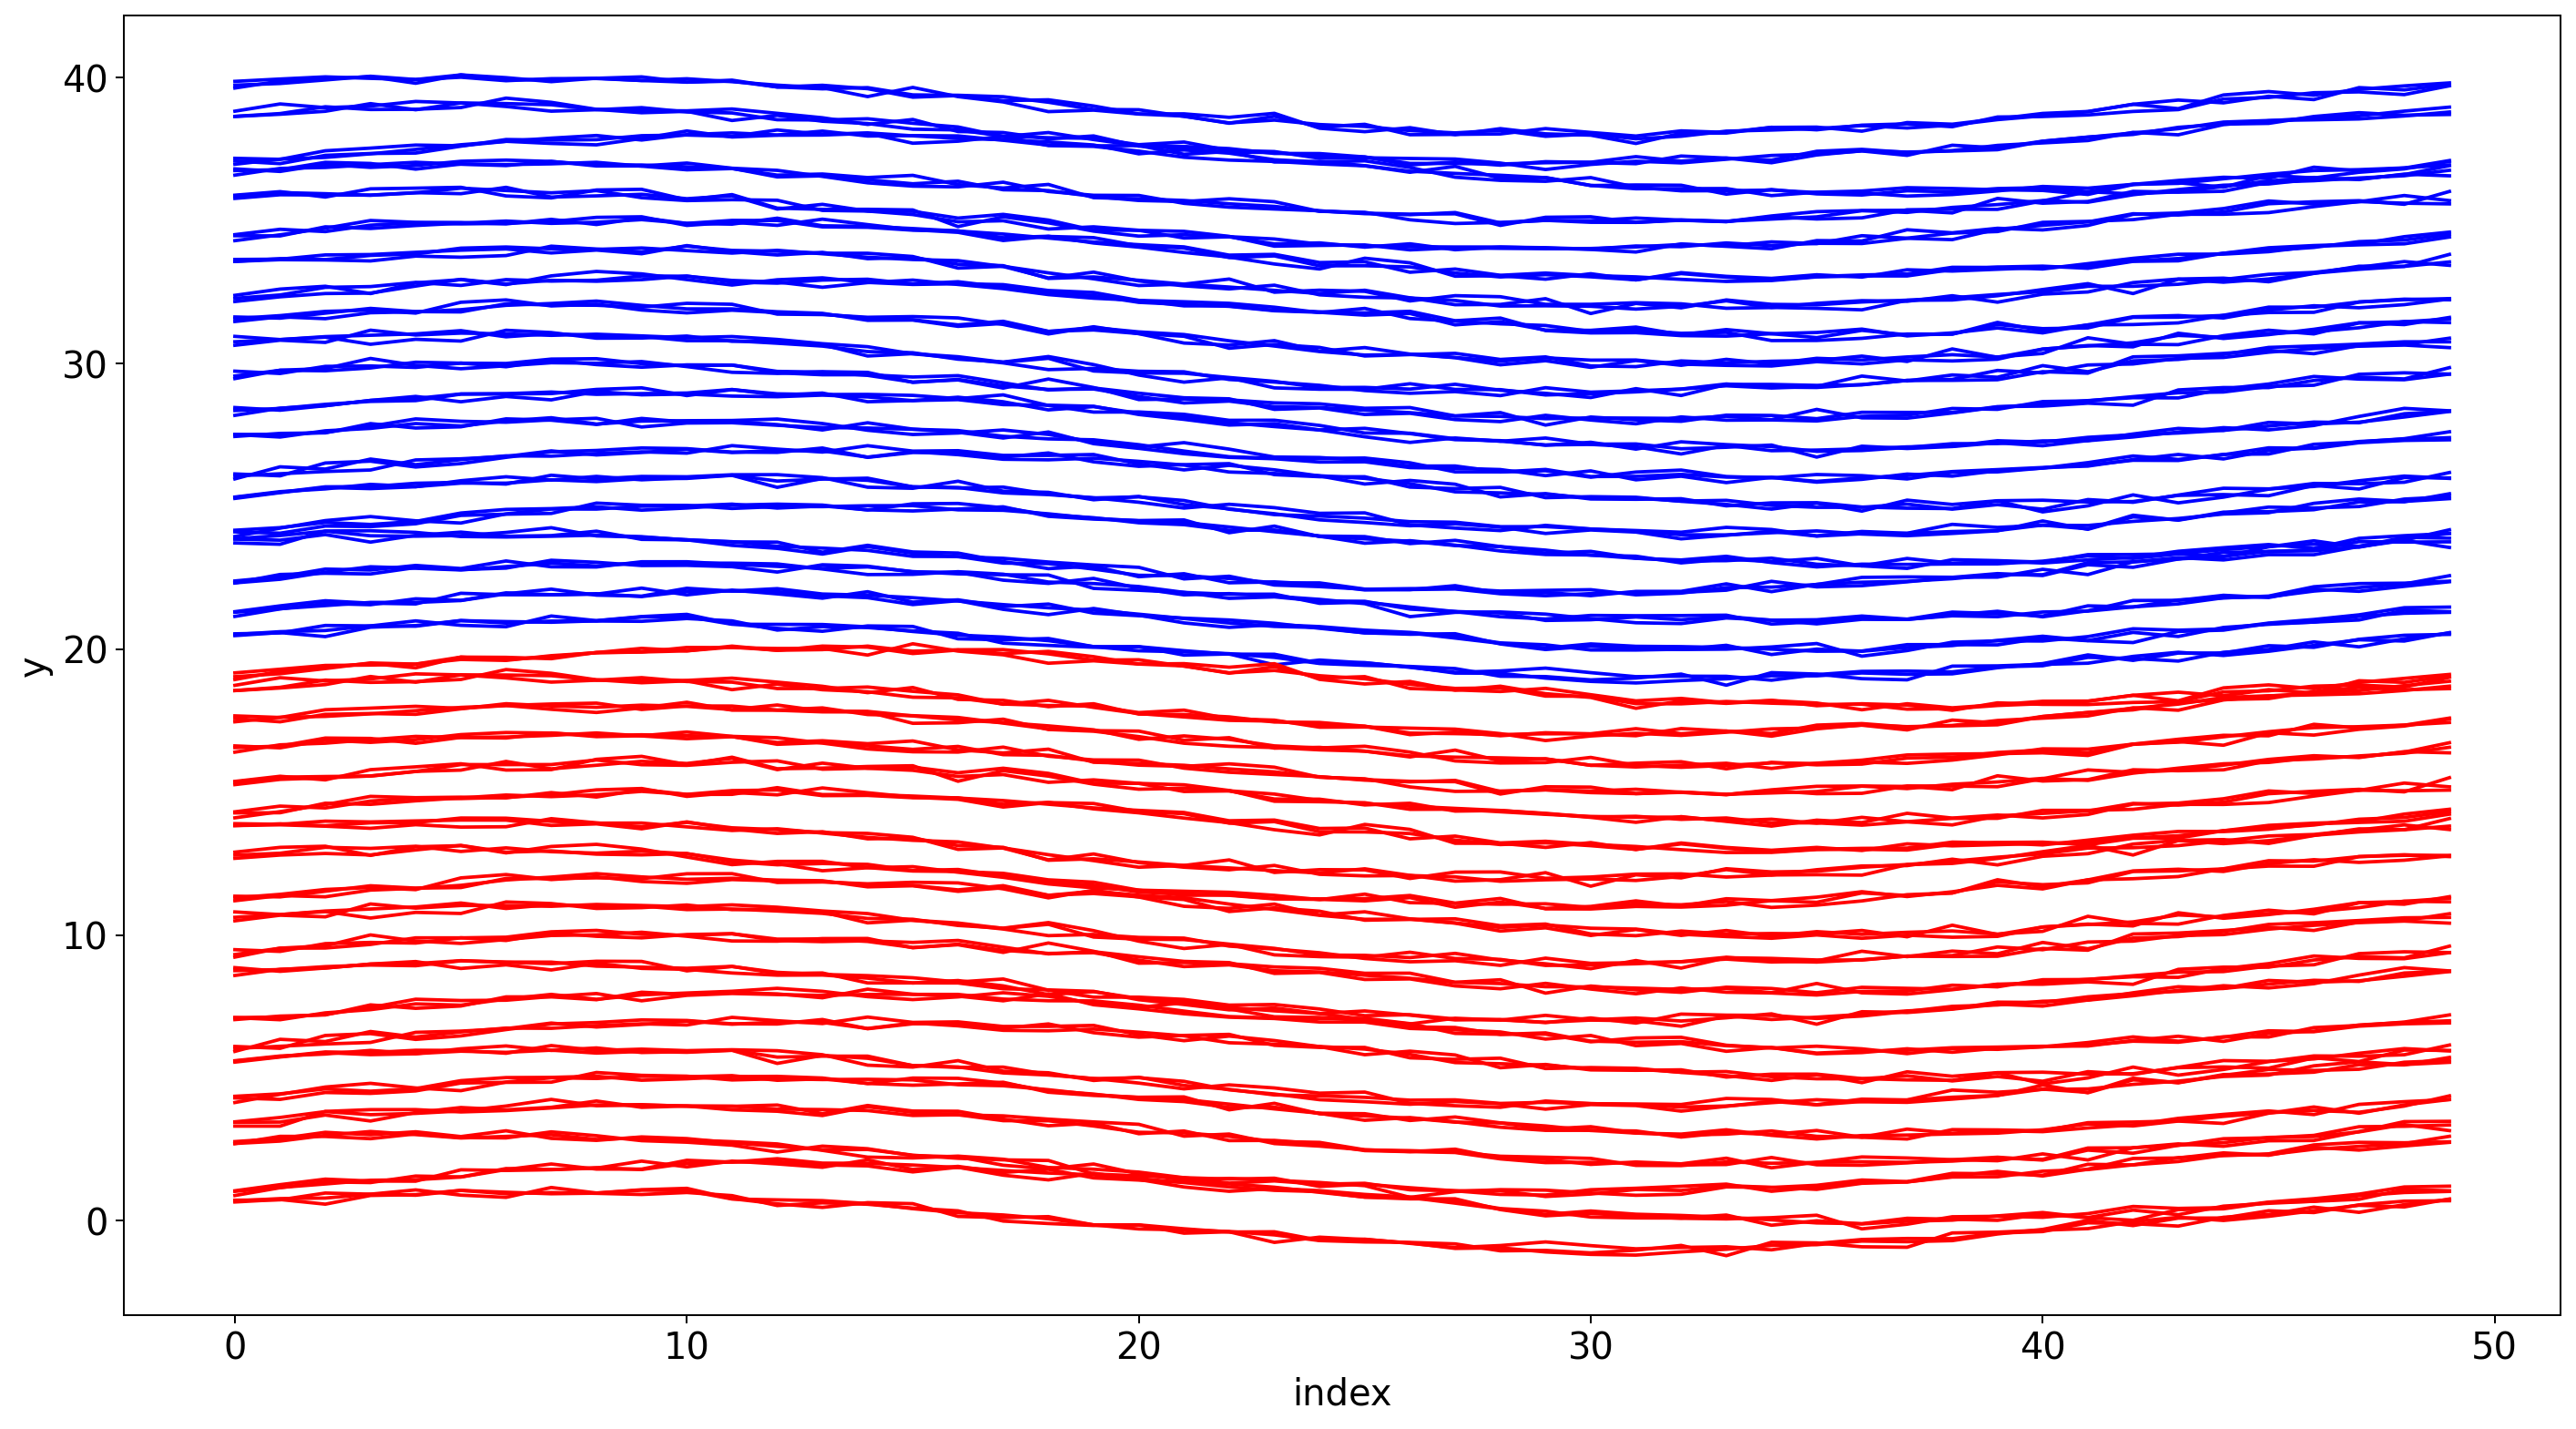

In [30]:
def generate_4d(
    shape:tuple=None,
    xmin:float=0, xmax:float=1,
    func=None
    ):
    if shape is None:
        shape = (1,20,1,1)
    if func is None:
        func = np.sin
    X = np.empty(shape)
    for i, xi in enumerate(X):
        x_ = np.linspace(np.zeros((X.shape[-2],X.shape[-1]))+xmin, xmax, X.shape[1])
        
        hshift = np.random.rand(x_.shape[1]).reshape(1,-1,1)
        vshift = np.zeros_like(x_)+i
        cnoise = np.random.randn(x_.shape[0], x_.shape[2]).reshape(50,1,-1)*0.1
        vshift[:,1,:] += X.shape[0]
        X[i] = func(x_+hshift) + vshift + cnoise

    return X

X = generate_4d(
    shape=(20,50,2,3),
    xmin=0, xmax=2*np.pi,
    func=np.sin
)

#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in X:
    ax1.plot(x[:,0,:], 'r-')
    # ax1.plot(x[:,1,0], 'r-')
    ax1.plot(x[:,1,:], 'b-')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

### Apply Scaling
Here are multiple examples for scaling along different axes with the internal `range_scaler`.

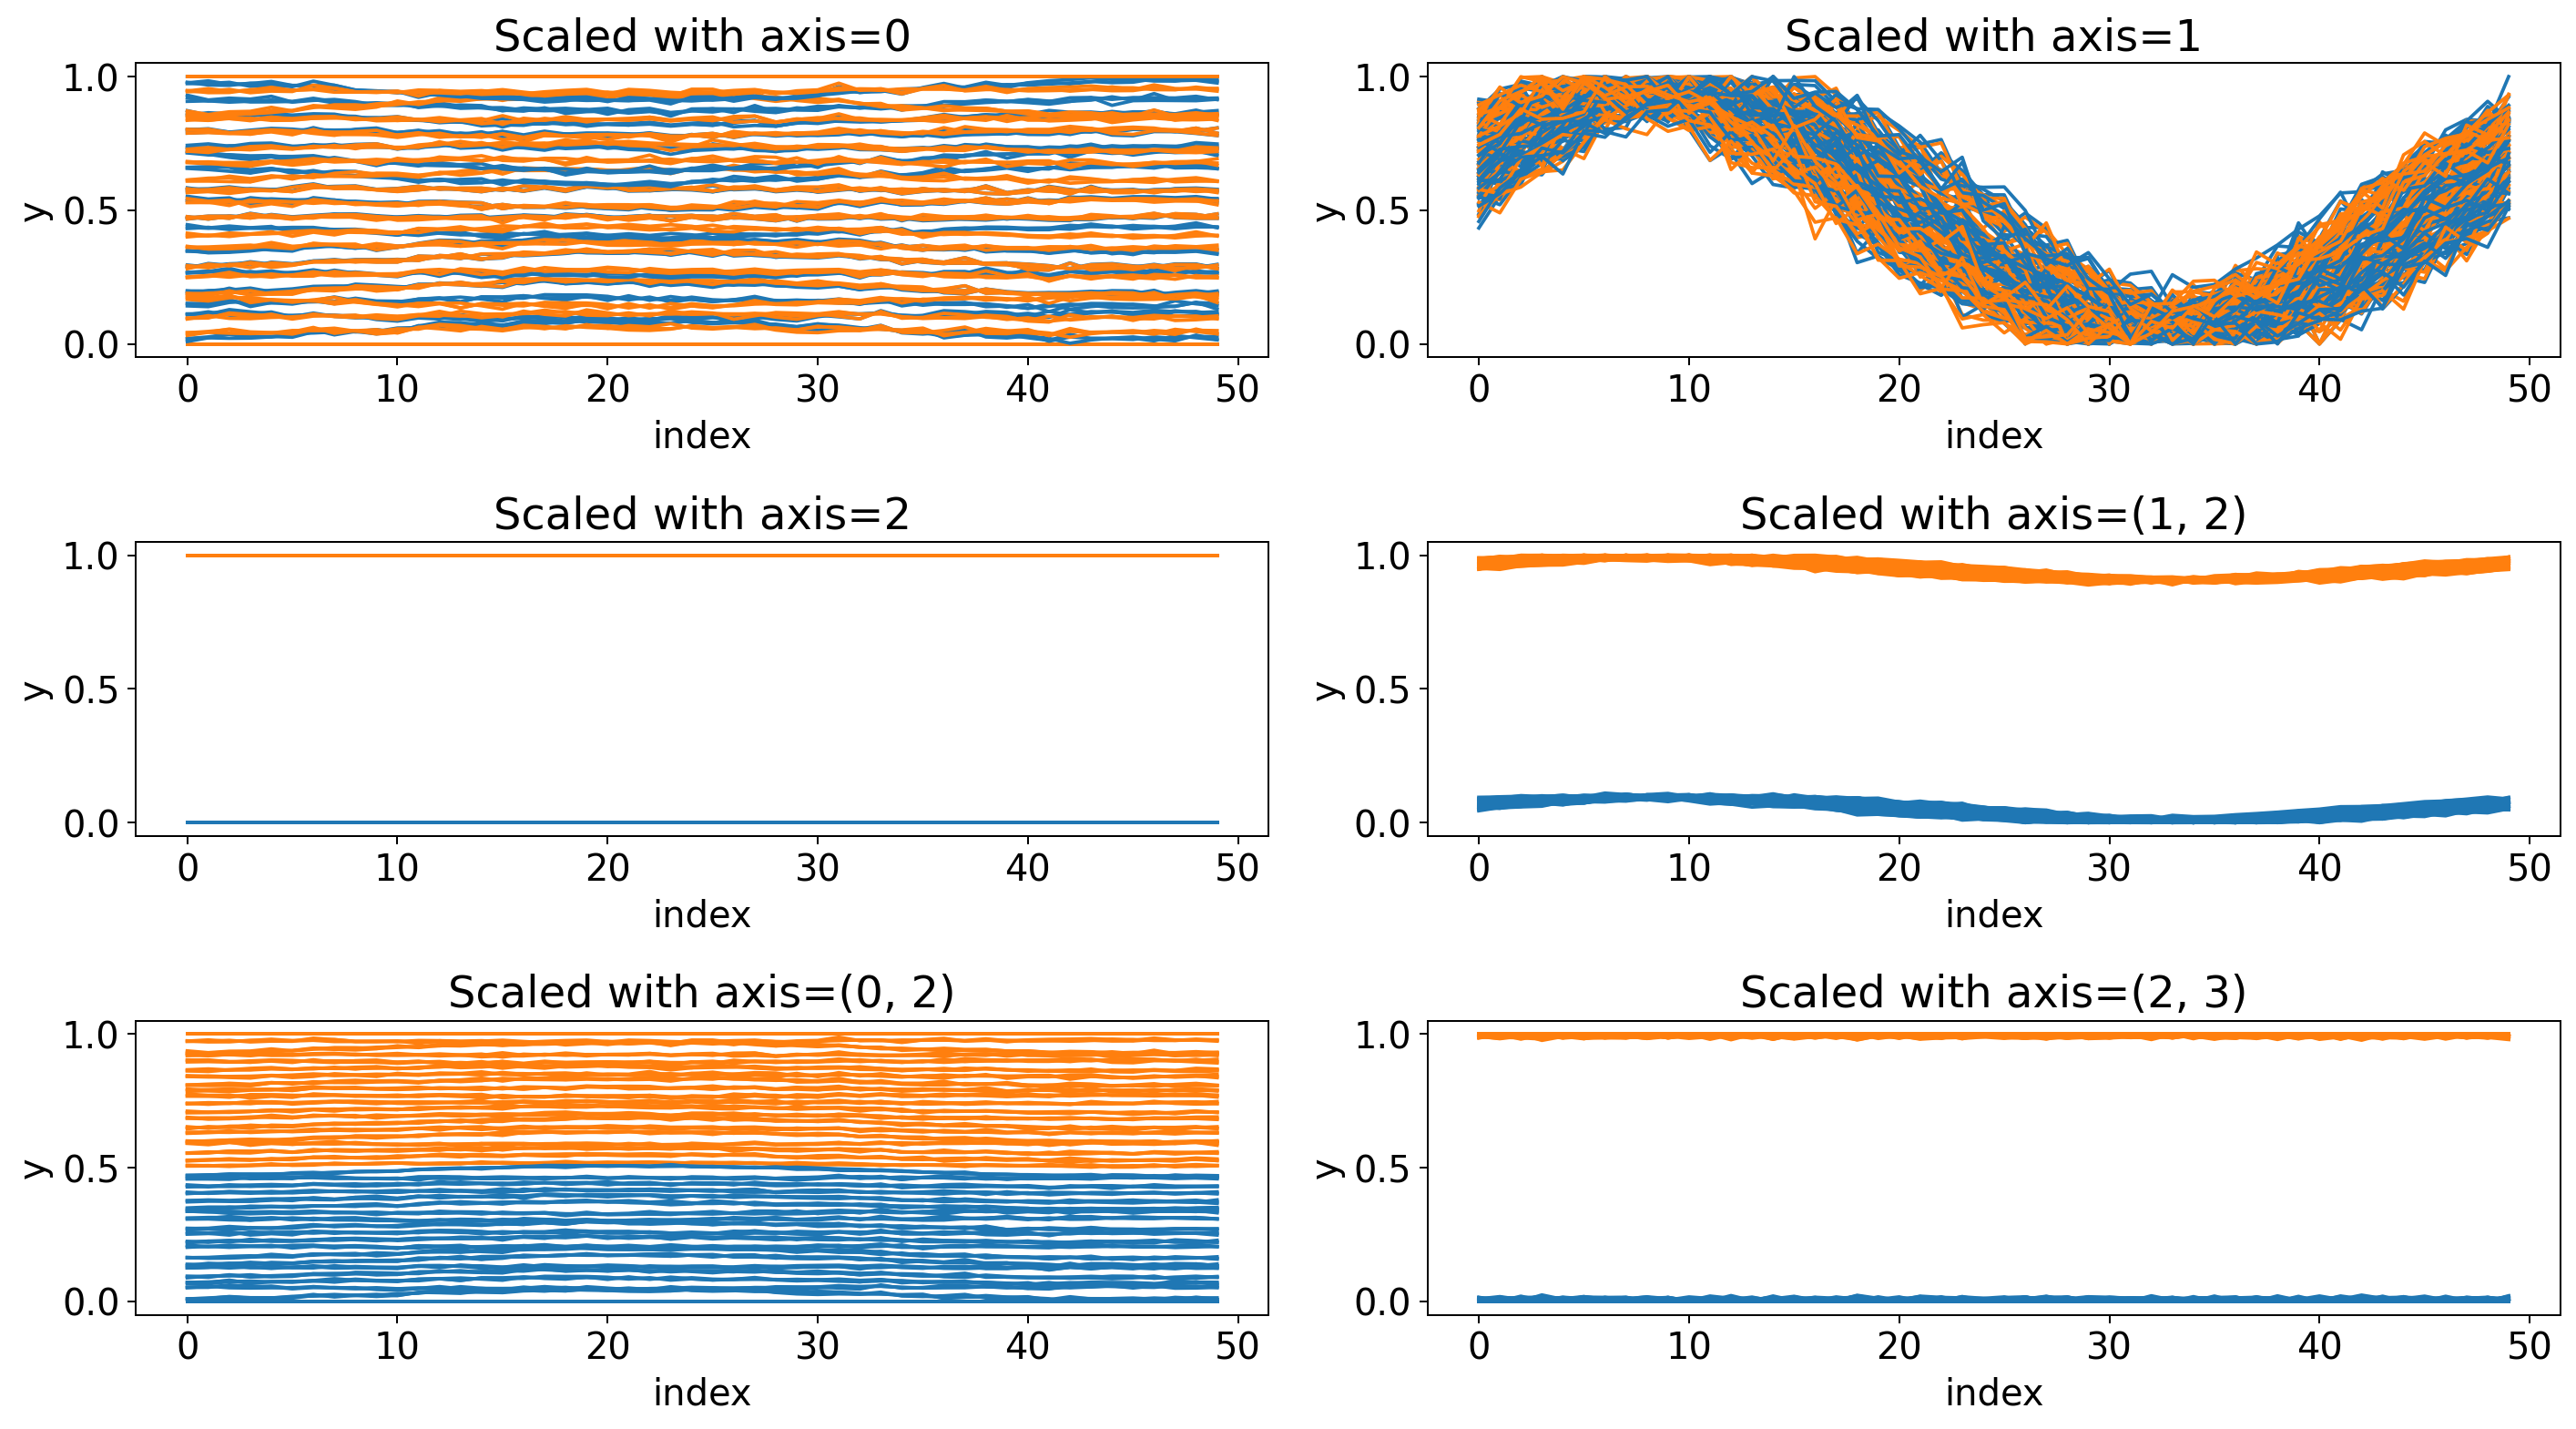

In [31]:
importlib.reload(alprsc)

plt.rcParams['figure.figsize'] = (16,9)
axislist = [0, 1, 2, (1,2), (0,2), (2,3)]

AS = alprsc.AxisScaler(scaler='range_scaler', axis=None)

fig = plt.figure()

for idx, axis in enumerate(axislist):
    X_scaled = AS.fit_transform(X, scaler_kwargs={'axis':axis})
    axi = fig.add_subplot(3,2,idx+1)
    axi.set_title(f'Scaled with axis={axis}')
    for x in X_scaled:
        axi.plot(x[:,0,:], color='tab:blue')
        axi.plot(x[:,1,:], color='tab:orange')
    axi.set_xlabel('index')
    axi.set_ylabel('y')
plt.tight_layout()
plt.show()